In [4]:
# first upload kaggle profile api key.
! pip install kaggle

In [5]:
! kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99%|██████████████████████████████████████▊| 1.06G/1.06G [00:06<00:00, 159MB/s]
100%|███████████████████████████████████████| 1.06G/1.06G [00:06<00:00, 181MB/s]


In [6]:
# it will unzip the zipped dataset without printing the extracted big outputs
!unzip dogs-vs-cats.zip > /dev/null 2>&1


In [7]:
import tensorflow as tf

from tensorflow import keras

# Importing the Sequential model class, which allows stacking layers in a linear manner to create a neural network
from tensorflow.keras import Sequential

# Importing specific layer types used in building convolutional neural networks (CNNs)
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
# Dense: A fully connected layer used in neural networks for learning relationships between features.
# Conv2D: A convolutional layer for processing image data, used to extract spatial features.
# MaxPooling2D: A pooling layer that reduces spatial dimensions, making the model computationally efficient.
# Flatten: Converts 2D feature maps into a 1D vector to be fed into dense layers.
# BatchNormalization: Normalizes the inputs of a layer to stabilize and accelerate training.
# Dropout: A regularization technique to prevent overfitting by randomly setting a fraction of inputs to zero.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
batch_size = 16
# Setting the batch size to 16, meaning 16 images will be processed at a time during training or validation.

# Creating a data generator for training images with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,         # Randomly rotates images by up to 40 degrees.
    width_shift_range=0.2,     # Randomly shifts images horizontally by 20% of their width.
    height_shift_range=0.2,    # Randomly shifts images vertically by 20% of their height.
    rescale=1./255,            # Rescales pixel values to the range [0, 1] for normalization.
    shear_range=0.2,           # Applies random shearing transformations with an intensity of 0.2.
    zoom_range=0.2,            # Randomly zooms in or out by 20%.
    horizontal_flip=True,      # Randomly flips images horizontally.
    fill_mode='nearest'        # Fills in missing pixels after transformations using nearest pixel values.
)

# Creating a data generator for test/validation images without augmentation (only normalization)
test_datagen = ImageDataGenerator(rescale=1./255)
# Rescale: Normalizes pixel values to the range [0, 1].

# Generating training batches from images in the '/content/train' directory
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dogs-vs-cats/train',          # Path to the training image directory.
    target_size=(256, 256),    # Resizes all images to 256x256 pixels.
    batch_size=batch_size,     # Number of images per batch (16 in this case).
    class_mode='binary'        # Specifies binary classification (e.g., cats vs. dogs).
)

# Generating validation batches from images in the '/content/test' directory
validation_generator = test_datagen.flow_from_directory(
   '/kaggle/input/dogs-vs-cats/test',           # Path to the validation image directory.
    target_size=(256, 256),    # Resizes all images to 256x256 pixels.
    batch_size=batch_size,     # Number of images per batch (16 in this case).
    class_mode='binary'        # Specifies binary classification.
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
# Creating a Sequential model to define the CNN architecture
model = Sequential()

# Adding the first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# Conv2D: 32 filters, each of size 3x3, no padding ('valid'), ReLU activation function.
# input_shape=(256, 256, 3): Specifies input images are 256x256 pixels with 3 color channels (RGB).

model.add(BatchNormalization())
# BatchNormalization: Normalizes the outputs of the convolutional layer to stabilize and speed up training.

# Adding the first max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
# MaxPooling2D: Downsamples the feature maps by taking the maximum value in each 2x2 region.
# Strides of 2 reduce the size of the feature maps by half.

# Adding the second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# Conv2D: 64 filters, each of size 3x3, no padding ('valid'), ReLU activation function.
# input_shape=(256, 256, 3): Redundant declaration of input shape after the first layer.

model.add(BatchNormalization())
# BatchNormalization: Normalizes the outputs of the second convolutional layer.

# Adding the second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
# MaxPooling2D: Another pooling layer with a 2x2 window and a stride of 2.

# Adding the third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# Conv2D: 128 filters, each of size 3x3, no padding ('valid'), ReLU activation function.
# input_shape=(256, 256, 3): Redundant declaration of input shape after the first layer.

model.add(BatchNormalization())
# BatchNormalization: Normalizes the outputs of the third convolutional layer.

# Adding the third max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
# MaxPooling2D: A third pooling layer with a 2x2 window and a stride of 2.

# Flattening the 2D feature maps into a 1D vector for the dense layers
model.add(Flatten())
# Flatten: Converts the 2D feature maps into a 1D array to be passed into fully connected layers.

# Adding a dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))
# Dense: Fully connected layer with 128 neurons, applying the ReLU activation function.

model.add(Dropout(0.1))
# Dropout: Randomly sets 10% of the inputs to zero to reduce overfitting.

# Adding a dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))
# Dense: Fully connected layer with 64 neurons, applying the ReLU activation function.

model.add(Dropout(0.1))
# Dropout: Randomly sets 10% of the inputs to zero to further reduce overfitting.

# Adding the output layer with 1 neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))
# Dense: Output layer with 1 neuron for binary classification.
# Sigmoid activation outputs a probability value between 0 and 1.


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
# Compiling the model with optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# optimizer='adam': Adam optimizer adjusts the learning rate during training for efficient weight updates.
# loss='binary_crossentropy': Used for binary classification problems, measuring the difference between predicted and actual values.
# metrics=['accuracy']: Accuracy is tracked during training to evaluate the model's performance.


In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # Imports callback functions for training control and model saving.

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) 
# Stops training if validation loss doesn't improve for 3 consecutive epochs and restores the best model weights.
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
 # Saves the model to 'best_model.keras' whenever validation loss improves.

# Train the model
history = model.fit(
    train_generator,                                       # Training data generator for feeding data into the model.
    epochs=10,                                              # Number of epochs for training; adjust as required.
    validation_data=validation_generator,                  # Validation data generator for evaluating model performance.
    callbacks=[early_stopping, checkpoint]                 # List of callbacks to monitor and control training.
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 469s 366ms/step - accuracy: 0.5477 - loss: 3.0454 - val_accuracy: 0.6382 - val_loss: 0.6308
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 306s 243ms/step - accuracy: 0.6172 - loss: 0.6554 - val_accuracy: 0.5834 - val_loss: 0.7779
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 299s 238ms/step - accuracy: 0.6509 - loss: 0.6218 - val_accuracy: 0.6554 - val_loss: 0.6114
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 294s 234ms/step - accuracy: 0.6778 - loss: 0.5962 - val_accuracy: 0.6552 - val_loss: 0.6782
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 297s 237ms/step - accuracy: 0.6921 - loss: 0.5909 - val_accuracy: 0.5656 - val_loss: 1.0130
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 296s 235ms/step - accuracy: 0.7132 - loss: 0.5640 - val_accuracy: 0.7084 - val_loss: 0.6440



### Purpose:  
To train the model while implementing mechanisms for early stopping and saving the best model based on validation loss.

### Why This Matters:  
- **Early Stopping**: Prevents overfitting and saves computational resources by halting training when improvement stops.  
- **Model Checkpoint**: Ensures the best-performing model on validation data is saved for future use.  
- **Validation Monitoring**: Enhances model robustness by tracking performance on unseen data during training.

In [17]:
# importing OpenCV
import cv2

In [27]:
test_img1 = cv2.imread('/kaggle/input/catphoto/cat.jpg')
test_img2 = cv2.imread('/kaggle/input/dogphoto/dog.jpg')

In [28]:
import matplotlib.pyplot as plt

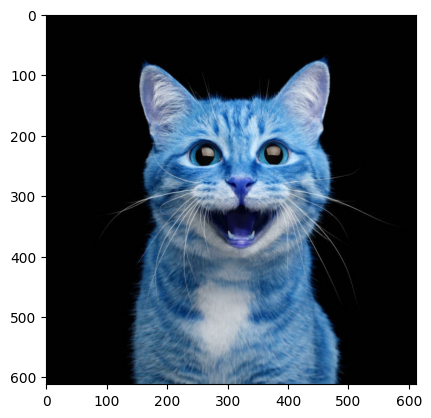

In [29]:
plt.imshow(test_img1)

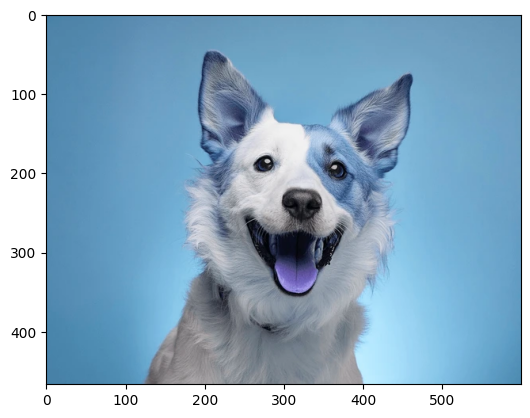

In [30]:
plt.imshow(test_img2)

In [33]:
test_img1.shape


(612, 612, 3)

In [34]:
test_img2.shape

(467, 600, 3)

In [35]:
# Resizing the input image to 256x256 pixels
test_img1 = cv2.resize(test_img1, (256, 256))
test_img2 = cv2.resize(test_img2, (256, 256))
# cv2.resize: Resizes the image to the specified size (256x256 pixels in this case).
# test_img: The image object being resized.
# (256, 256): The new size for the image (width, height).


In [36]:
# Reshaping the resized image to match the model's input shape
test_input1 = test_img1.reshape((1, 256, 256, 3))
test_input2 = test_img2.reshape((1, 256, 256, 3))
# reshape: Changes the shape of the image to (1, 256, 256, 3), where:
# 1: The batch size (since we are processing a single image, the batch size is 1).
# 256: The image height.
# 256: The image width.
# 3: The number of color channels (RGB).

In [37]:
# 0 -> cat
# 1 -> dog
# because in our file we passed cat.jpg before then dog.jpg
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.]], dtype=float32)

In [43]:
# 0 -> cat
# 1 -> dog
# because in our file we passed cat.jpg before then dog.jpg
model.predict(test_input2) # because of the low accuracy the model is failed to predict dog 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)